# 1. Imports

In [3]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

# 2. Load the Data

In [10]:
import gdown

TRAINING_FILE = './data/sign_mnist_train.csv'
VALIDATION_FILE = './data/sign_mnist_test.csv'

# sign_mnist_train.csv
gdown.download('https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR', TRAINING_FILE)

# sign_mnist_test.csv
gdown.download('https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg', VALIDATION_FILE)

Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /Users/jordanspooner/git/tensorflow-basics/Augmentation_and_Transfer_Learning/data/sign_mnist_train.csv
100%|██████████| 83.3M/83.3M [00:01<00:00, 52.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /Users/jordanspooner/git/tensorflow-basics/Augmentation_and_Transfer_Learning/data/sign_mnist_test.csv
100%|██████████| 21.8M/21.8M [00:00<00:00, 37.3MB/s]


'./data/sign_mnist_test.csv'

# 3. Parsing the dataset

In [11]:
def parse_data_from_input(filename):

    labels = []
    images = []

    with open(filename) as file:
        csv_reader = csv.reader(file, delimiter=',')

        # skipping the header
        next(csv_reader)
        for item in csv_reader:
            labels.append(item[0])
            image = np.array(item[1:], dtype='float64')
            images.append(image.reshape(28,28))

    images = np.array(images)
    labels = np.array(labels, dtype='float64')

    return images, labels

In [14]:
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

# 4. Data Visualisation

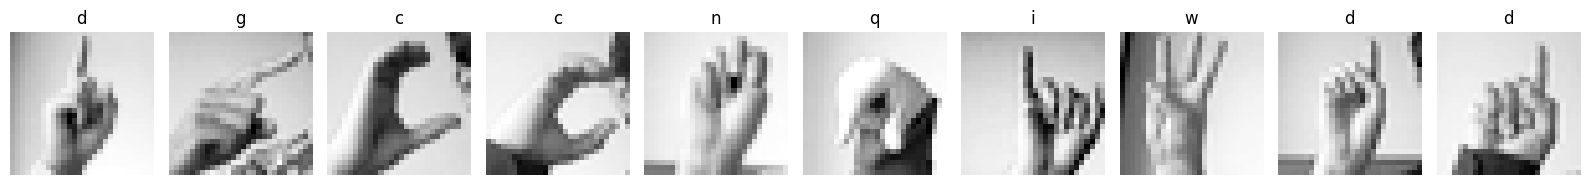

In [22]:
def plot_categories(training_images, training_labels):
    fig, axes = plt.subplots(1, 10, figsize=(16, 15))

    # The axes array is initially a 2D array (1 row, 10 columns)
    # flatten() is used to convert it into a 1D array. 
    # This makes it easier to iterate over all the subplots.
    axes = axes.flatten()
    letters = list(string.ascii_lowercase)

    for k in range(10):
        img = training_images[k]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img, cmap='Greys_r')
        ax.set_title(f"{letters[int(training_labels[k])]}")
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

plot_categories(training_images, training_labels)

# 5. Creating the Generators

In [24]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
    # You must add another dimension to the data here, the data is set up like (10000, 28, 28)
    # But, you need the data to have a fourth dimension, a colour dimension, (10000, 28, 28, 1)
    training_images = np.expand_dims(training_images, axis=-1)
    validation_images = np.expand_dims(validation_images, axis=-1)

    train_datagen = ImageDataGenerator(rescale=1./255.,
                                       rotation_range=10, 
                                       width_shift_range=0.1,
                                       height_shift_range=0.1,
                                       shear_range=0.1,
                                       zoom_range=0.1,
                                       fill_mode='nearest')
    
    train_generator = train_datagen.flow(x=training_images,
                                         y=training_labels,
                                         batch_size=32)
    
    validation_datagen = ImageDataGenerator(rescale=1./255.)

    validation_generator = validation_datagen.flow(x=validation_images,
                                                   y=validation_labels,
                                                   batch_size=32)
    
    return train_generator, validation_generator

In [25]:
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

# 6. Coding the CNN

In [30]:
def create_model():
    # Only have 25 outputs as Z is barely used
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(25, activation='softmax')
    ])

    # loss specifically chosen when we are not using one hot encoded preprocessed labels
    model.compile(optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model



In [31]:
model = create_model()

history = model.fit(train_generator, 
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
858/858 [==============================] - 5s 5ms/step - loss: 1.6078 - accuracy: 0.5054 - val_loss: 0.5842 - val_accuracy: 0.7980
Epoch 2/15
858/858 [==============================] - 5s 5ms/step - loss: 0.6146 - accuracy: 0.7980 - val_loss: 0.2579 - val_accuracy: 0.9101
Epoch 3/15
858/858 [==============================] - 5s 5ms/step - loss: 0.3231 - accuracy: 0.8932 - val_loss: 0.1735 - val_accuracy: 0.9398
Epoch 4/15
858/858 [==============================] - 5s 5ms/step - loss: 0.2019 - accuracy: 0.9335 - val_loss: 0.0751 - val_accuracy: 0.9840
Epoch 5/15
858/858 [==============================] - 5s 6ms/step - loss: 0.1453 - accuracy: 0.9527 - val_loss: 0.0803 - val_accuracy: 0.9724
Epoch 6/15
858/858 [==============================] - 5s 6ms/step - loss: 0.1061 - accuracy: 0.9661 - val_loss: 0.0706 - val_accuracy: 0.9824
Epoch 7/15
858/858 [==============================] - 5s 6ms/step - loss: 0.0823 - accuracy: 0.9744 - val_loss: 0.0471 - val_accuracy: 0.9897
Epoch 

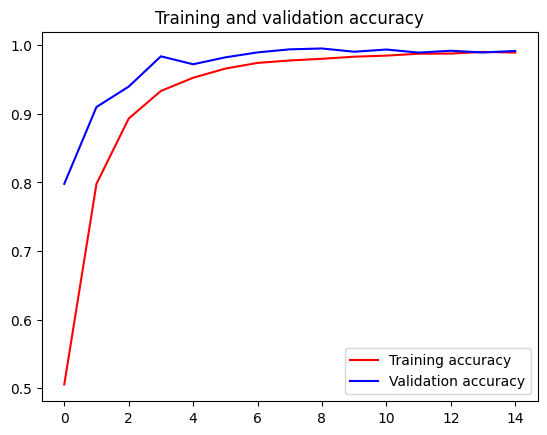

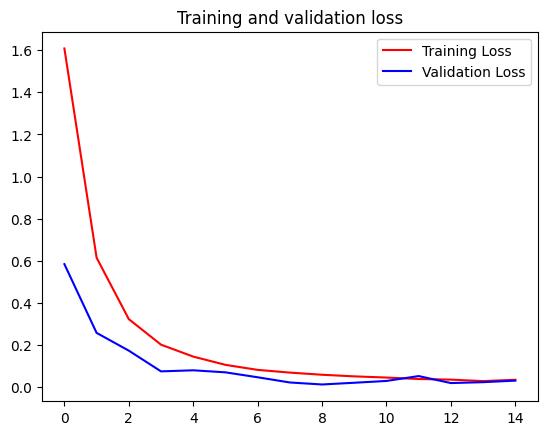

In [32]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()